In [34]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
import argparse

def make_graph(G,address,limit,allAddresses,transac,addresses=None):
    url = f"https://api.kas.fyi/v1/addresses/{address}/transactions?limit={limit}"
    headers = {"x-api-key": API_KEY}

    response = requests.get(url, headers=headers)
    data = response.json()
    try:
        for transactions in data["transactions"]:
            for input in transactions["inputs"]:
                incomeAddress=input["previousOutput"]["scriptPublicKeyAddress"]
                if incomeAddress not in transac:
                    transac[incomeAddress]={}
                for output in transactions["outputs"]:
                    outcomeAddress=output["scriptPublicKeyAddress"]
                    if outcomeAddress not in transac[incomeAddress]:
                        transac[incomeAddress][outcomeAddress]=1
                    else:
                        transac[incomeAddress][outcomeAddress]+=1
        if addresses is None:
            addresses=[]
        for income in transac:
            if income not in addresses and income not in allAddresses:
                addresses.append(income)
            for outcome in transac[income]:
                G.add_edge(income[:15],outcome[:15],weight=transac[income][outcome])
                if outcome not in addresses and outcome not in allAddresses:
                    addresses.append(outcome)
    except:
        print("ERREUR : ",address)
    return G,addresses,transac


COLOR=[
        "blue",
        "red",
        "orange",
        "yellow",
        "black"
    ]

In [35]:
def main(outcome,nb_cercles,limit):

    G=nx.DiGraph()
    allOutcomes=[]
    allOutcomes.append([outcome])
    allAddresses=[]
    allAddresses.extend([outcome])
    print(len(allAddresses))
    colors=[]
    transac={}
    for cercle in range(nb_cercles):
        print("Size : ",len(allOutcomes[cercle]))
        for i in range(len(allOutcomes[cercle])):
            colors.append(COLOR[cercle])
            print(allOutcomes[cercle][i])
            G,outcomes,transac=make_graph(G,allOutcomes[cercle][i],transac=transac,limit=limit,allAddresses=allAddresses)
            if outcomes is not None:
                allOutcomes.append(outcomes)
                allAddresses.extend(outcomes)
            print(len(allAddresses))
    for i in range(len(G)-len(colors)):
        colors.append(COLOR[nb_cercles-1])
    print(len(G))
    plt.figure(figsize=(18, 14))

    pos = nx.spring_layout(
        G,
        k=3,
        iterations=300
    )

    nx.draw(
        G, pos,
        with_labels=True,
        node_color=colors,
        node_size=1800,
        font_size=8,
        arrowsize=15
    )

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

    plt.title("Kaspa Graph")
    plt.show()
    return allAddresses,transac


1
Size :  1
kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x
4
Size :  3
kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2
22
kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl
27
kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph
28
Size :  18
kaspa:qzd6umkvus5a92egme7um3nvegqkvk2z2s7zppqenc5h33ryr0cwyza8ugs9a
29
kaspa:qr9yrweks8sdl0e9zsx397euukalwcqlsdagxkac8zdf0wkg5y8jk6s03s62x
31
kaspa:qpl4c5qshrv0suqv6tzy4ry5m9m2mvkptafw4fa30w9ylwhy5t90vumml6eal
33
kaspa:qq5rzqsnqxfqcekwfl52yf4wn9asn5f0qdyan95umuf6x4fxddyrzqc6tpnsr
34
kaspa:qpued3cy4uz7naclcu2mxn3an264wvpylwtv28qml9fwxl0xjxwg5lv3ptt5y
38
kaspa:qzn86x39ky4j0435ywws9udhey7eay8x8cxl2j4wtkn29uaqycnq7jt89pzxg
39
kaspa:qpzjmf0hfx6uypfer80dmm63r03vy8atte02l7p49cjurk834hg7yjaymg9qy
39
kaspa:qq0mdzukvps38dkrxydlfjd7nykzceqd3cgjdffmys7sk0cyt7vu5guxgg66u
40
kaspa:qrcm4wjvmw9qhts24p7gpxm02c3n7y46gqqtea4uk5shzp5ywd63yh09szwdg
41
kaspa:qq37zrym2t7d9ck877xetmtpqh0gpn343w96p

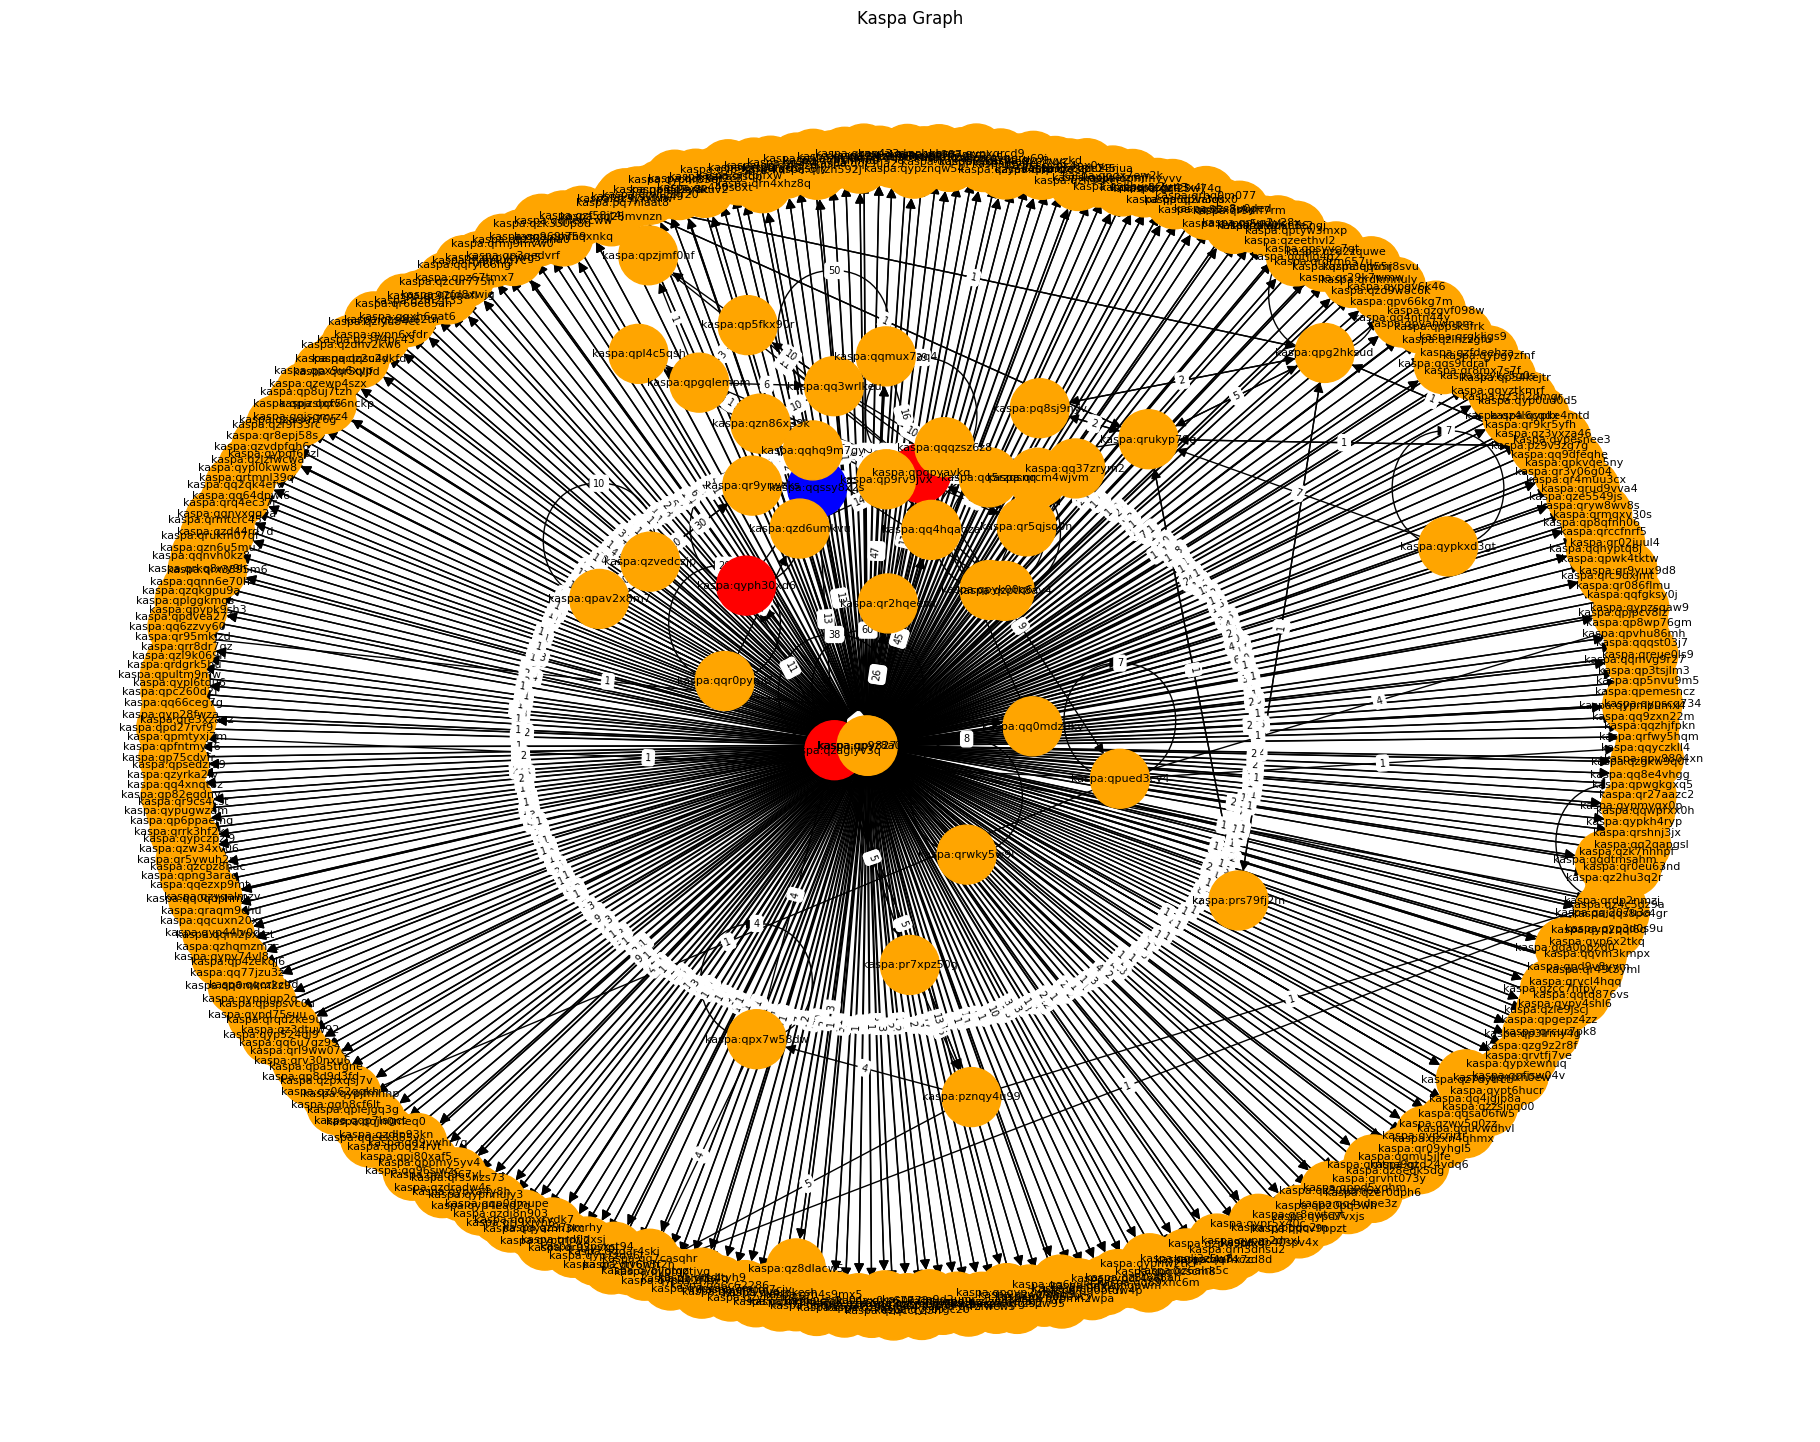

In [36]:
address="kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x"
API_KEY="kdp_722ad9825ff1144878629812d69609b0e3084323ec6d4299ffd4cbd4b23a0f2b"
nb_cercles=3
limit=20

allAddresses,transac=main(address,nb_cercles,limit)

In [37]:
print(len(transac))

44


In [39]:
print(transac)

{'kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x': {'kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2': 11}, 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl': {'kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x': 13, 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl': 38, 'kaspa:pznqy4u998e6j7ra40x3659wxdve3cj6r2fshdjnt4x85m0xghq7ug5hfs0ta': 5, 'kaspa:pr7xpz50gk9r4gvf9y5h5wmcsqgfku8s6f4mcu3km568huw0dhnd7dfk8mjtz': 9, 'kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph': 11}, 'kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph': {'kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x': 23, 'kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph': 23}, 'kaspa:qzd6umkvus5a92egme7um3nvegqkvk2z2s7zppqenc5h33ryr0cwyza8ugs9a': {'kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2': 14}, 'kaspa:qr9yrweks8sdl0e9zsx39

In [43]:
for outer_key, inner_dict in transac.items():
    print(outer_key,"->",inner_dict)

kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x -> {'kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2': 11}
kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl -> {'kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x': 13, 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl': 38, 'kaspa:pznqy4u998e6j7ra40x3659wxdve3cj6r2fshdjnt4x85m0xghq7ug5hfs0ta': 5, 'kaspa:pr7xpz50gk9r4gvf9y5h5wmcsqgfku8s6f4mcu3km568huw0dhnd7dfk8mjtz': 9, 'kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph': 11}
kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph -> {'kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x': 23, 'kaspa:qyph30xd6t4xnpl2kxklu53vc7lpukdxgx5fs374dj089psakmqz3cc4q2lnqph': 23}
kaspa:qzd6umkvus5a92egme7um3nvegqkvk2z2s7zppqenc5h33ryr0cwyza8ugs9a -> {'kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2': 14}
kaspa:qr9yrweks8sdl0e9zsx397euuka

In [38]:
import pandas as pd
df=pd.DataFrame(allAddresses)
df=df.drop_duplicates()
print(len(allAddresses))
print(len(df))

425
425
